In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/11000-medicine-details/Medicine_Details.csv


In [2]:
meds = pd.read_csv('/kaggle/input/11000-medicine-details/Medicine_Details.csv')

In [3]:
meds

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29
...,...,...,...,...,...,...,...,...,...
11820,Zilarta-CT 40/6.25 Tablet,Azilsartan medoxomil (40mg) + Chlorthalidone (...,Hypertension (high blood pressure),Dizziness Tiredness Decreased potassium level ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Micro Labs Ltd,67,33,0
11821,Zipcoz Tablet,Chromium Picolinate (100mcg) + D-Chiro Inosito...,Polycystic ovarian syndrome (PCOS),Rash Nausea Paresthesia tingling or pricking s...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Lifeline Remedies India Pvt Ltd,0,80,20
11822,Zestasil 100 Tablet,Sildenafil (100mg),Treatment of Erectile dysfunction,Flushing sense of warmth in the face ears neck...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",TBG pharma ltd,25,75,0
11823,Zedruff Shampoo,Ketoconazole (2% w/v) + Zinc pyrithione (1% w/v),Treatment of Dandruff,Application site reactions burning irritation ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Minova Life Sciences Pvt Ltd,0,0,100


In [4]:
# Columns that we are going to keep

# Medicine_Name
# Composition
# uses
# Image_URL
# Manufacturer
# All three reviews


meds = meds[['Medicine Name', 'Composition', 'Uses', 'Image URL', 'Manufacturer', 'Excellent Review %', 'Average Review %', 'Poor Review %']]
meds.head(5)

,Medicine Name,Composition,Uses,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [5]:
# Checking for null entries
meds.isnull().sum()

Medicine Name         0
Composition           0
Uses                  0
Image URL             0
Manufacturer          0
Excellent Review %    0
Average Review %      0
Poor Review %         0
dtype: int64

In [6]:
# Checking for duplicate entries
meds.duplicated().sum()

85

In [7]:
# Dropping duplicate entries
medicines = meds.drop_duplicates()

In [8]:
medicines.duplicated().sum()

0

In [9]:
meds.head()

,Medicine Name,Composition,Uses,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


## EDA

In [10]:
meds['Composition'].value_counts()

Composition
Luliconazole (1% w/w)                                                                                   98
Levocetirizine (5mg) + Montelukast (10mg)                                                               77
Ketoconazole (2% w/w)                                                                                   66
Domperidone (30mg) + Rabeprazole (20mg)                                                                 60
Itraconazole (100mg)                                                                                    53
                                                                                                        ..
Sodium Picosulfate (3.33mg/5ml) + Liquid Paraffin (1.25ml/5ml) + Milk Of Magnesia (3.75ml/5ml)           1
Ambroxol (60mg) + Phenylephrine (5mg) + Levocetirizine (5mg)                                             1
Digoxin (0.25mg)                                                                                         1
Sulphacetamide (20% w/v) 

In [11]:
salts_name = list(meds['Composition'].value_counts().keys())[0:20]
count_of_meds_with_that_salt = list(meds['Composition'].value_counts())[0:20]

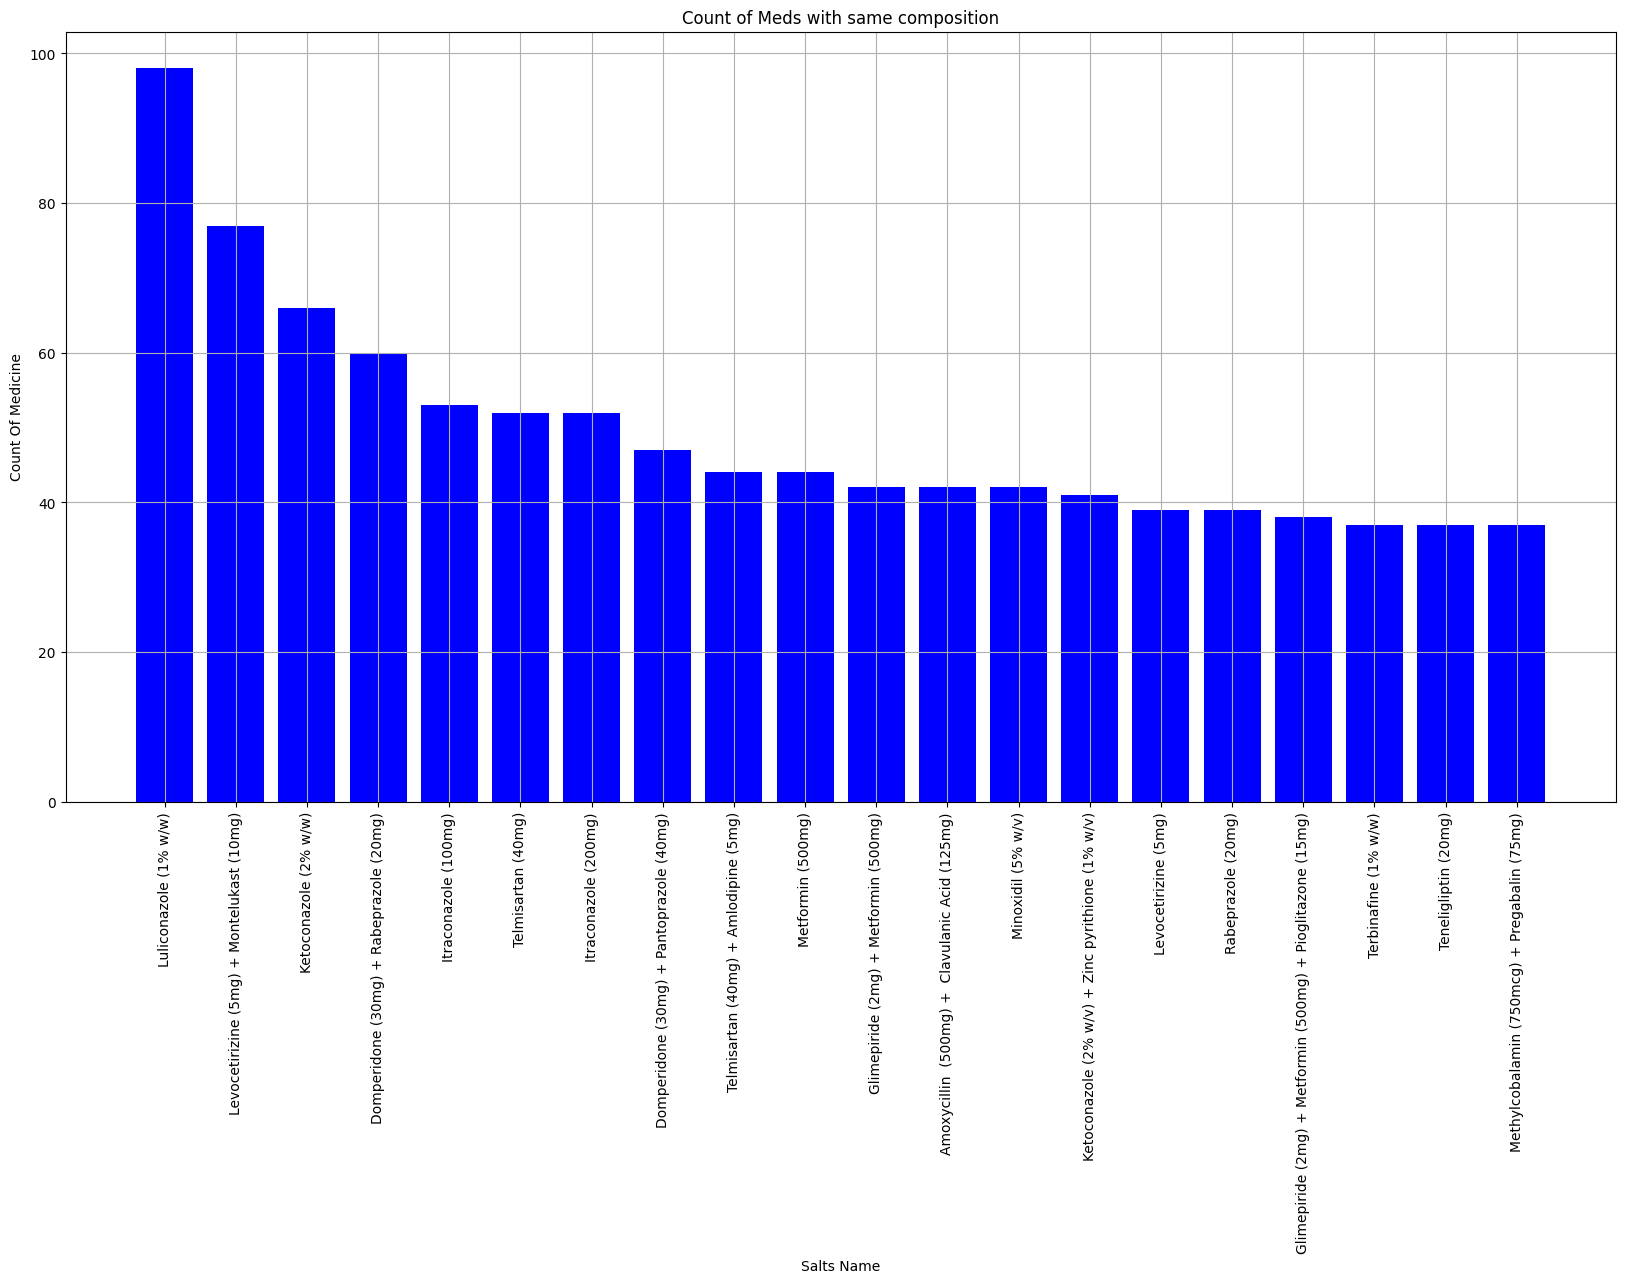

In [12]:
# Composition

from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.bar(salts_name, count_of_meds_with_that_salt, color = 'b')
plt.grid(True)
plt.title('Count of Meds with same composition')
plt.xticks(rotation=90)
plt.xlabel('Salts Name')
plt.ylabel('Count Of Medicine')
plt.show()

In [13]:
meds['Manufacturer'].value_counts()

Manufacturer
Sun Pharmaceutical Industries Ltd    820
Intas Pharmaceuticals Ltd            654
Cipla Ltd                            574
Torrent Pharmaceuticals Ltd          445
Lupin Ltd                            435
                                    ... 
Universal NutriScience                 1
Orison Pharma International            1
Pacific Biotech                        1
Misae Lifesciences Pvt Ltd             1
Albia Biocare                          1
Name: count, Length: 759, dtype: int64

In [14]:
manu_name = list(meds['Manufacturer'].value_counts().keys())[0:30]
count_manufacture_name = list(meds['Manufacturer'].value_counts())[0:30]

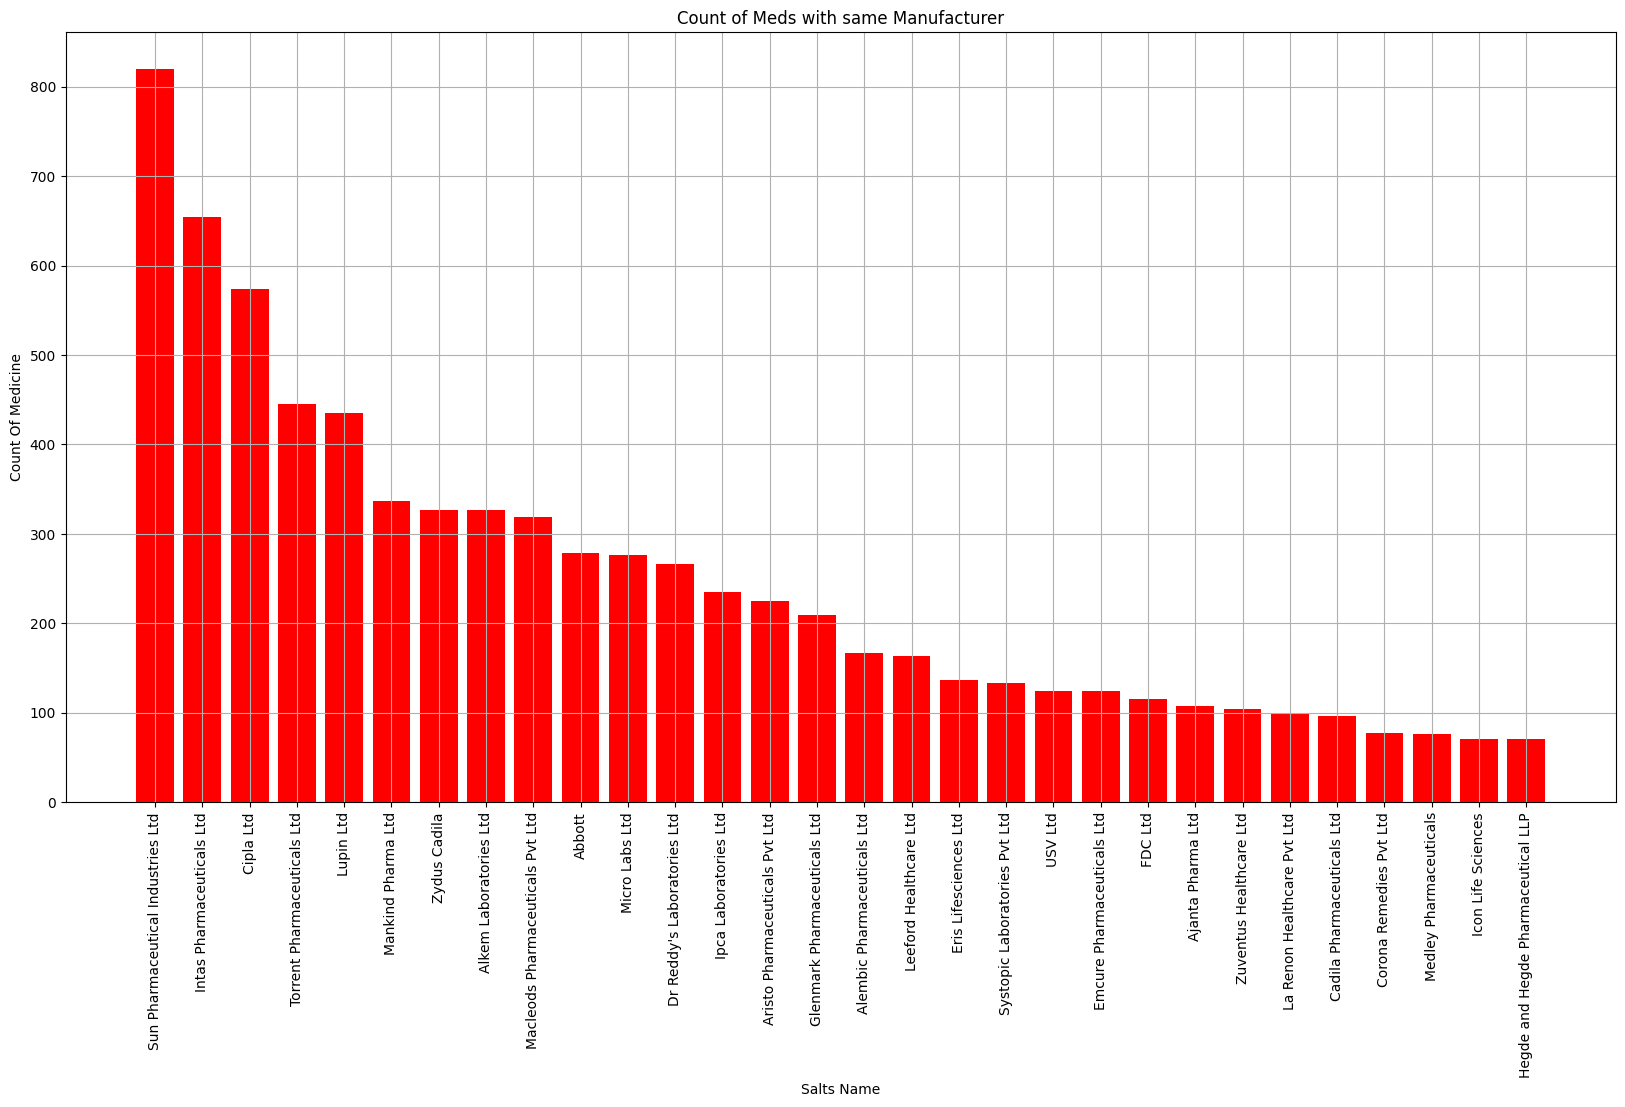

In [15]:
# Manufacturer 

plt.figure(figsize=(20,10))
plt.bar(manu_name, count_manufacture_name, color = 'r')
plt.grid(True)
plt.title('Count of Meds with same Manufacturer')
plt.xticks(rotation=90)
plt.xlabel('Salts Name')
plt.ylabel('Count Of Medicine')
plt.show()

In [16]:
# Removing + sign between the composition and separating each salt

def convert(input_string):
    # Split the input string using ' + ' as the delimiter
    salts = [item.strip() for item in input_string.split(' + ')]
    return salts

meds['Composition'] = meds['Composition'].apply(convert)

/tmp/ipykernel_20/82580483.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meds['Composition'] = meds['Composition'].apply(convert)


In [17]:
meds.head()

,Medicine Name,Composition,Uses,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,[Bevacizumab (400mg)],Cancer of colon and rectum Non-small cell lun...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,"[Amoxycillin (500mg), Clavulanic Acid (125mg)]",Treatment of Bacterial infections,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,[Azithromycin (500mg)],Treatment of Bacterial infections,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,"[Ambroxol (30mg/5ml), Levosalbutamol (1mg/5ml)...",Treatment of Cough with mucus,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,[Ranitidine (150mg)],Treatment of Gastroesophageal reflux disease (...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [18]:
# Converting Uses into list
meds['Uses'] = meds['Uses'].apply(lambda x:x.split())

/tmp/ipykernel_20/3398003917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meds['Uses'] = meds['Uses'].apply(lambda x:x.split())


In [19]:
meds.head()

,Medicine Name,Composition,Uses,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,[Bevacizumab (400mg)],"[Cancer, of, colon, and, rectum, Non-small, ce...","https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,"[Amoxycillin (500mg), Clavulanic Acid (125mg)]","[Treatment, of, Bacterial, infections]","https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,[Azithromycin (500mg)],"[Treatment, of, Bacterial, infections]","https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,"[Ambroxol (30mg/5ml), Levosalbutamol (1mg/5ml)...","[Treatment, of, Cough, with, mucus]","https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,[Ranitidine (150mg)],"[Treatment, of, Gastroesophageal, reflux, dise...","https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [20]:
# Removing spaces between salt name and its power

meds['Composition'] = meds['Composition'].apply(lambda x:[i.replace(" ","") for i in x])
meds.head()

/tmp/ipykernel_20/439034076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meds['Composition'] = meds['Composition'].apply(lambda x:[i.replace(" ","") for i in x])


,Medicine Name,Composition,Uses,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,[Bevacizumab(400mg)],"[Cancer, of, colon, and, rectum, Non-small, ce...","https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,"[Amoxycillin(500mg), ClavulanicAcid(125mg)]","[Treatment, of, Bacterial, infections]","https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,[Azithromycin(500mg)],"[Treatment, of, Bacterial, infections]","https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,"[Ambroxol(30mg/5ml), Levosalbutamol(1mg/5ml), ...","[Treatment, of, Cough, with, mucus]","https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,[Ranitidine(150mg)],"[Treatment, of, Gastroesophageal, reflux, dise...","https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [21]:
# Creating medicine score column for each medicine
#weight_excell = 5.0
#weight_avg = 3.0
#weight_poor = 1.0
# using this formula we are calculating medicine_score
# score = (excell_improvement/100 * weight_excell) + (avg_improvement/100 * weight_avg) + (poor_improvement/100 * weight_poor)

meds['Medicine Score'] = round((meds['Excellent Review %']/100 * 5.0) + (meds['Average Review %']/100 * 3.0) + (meds['Poor Review %']/100 *1.0), 2)

In [22]:
meds.head()

,Medicine Name,Composition,Uses,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %,Medicine Score
0,Avastin 400mg Injection,[Bevacizumab(400mg)],"[Cancer, of, colon, and, rectum, Non-small, ce...","https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22,3.00
1,Augmentin 625 Duo Tablet,"[Amoxycillin(500mg), ClavulanicAcid(125mg)]","[Treatment, of, Bacterial, infections]","https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18,3.58
2,Azithral 500 Tablet,[Azithromycin(500mg)],"[Treatment, of, Bacterial, infections]","https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21,3.36
3,Ascoril LS Syrup,"[Ambroxol(30mg/5ml), Levosalbutamol(1mg/5ml), ...","[Treatment, of, Cough, with, mucus]","https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35,2.78
4,Aciloc 150 Tablet,[Ranitidine(150mg)],"[Treatment, of, Gastroesophageal, reflux, dise...","https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29,3.10


## EDA on Medicine Score 

In [23]:
meds['Medicine Score'].value_counts()

Medicine Score
4.34    910
3.00    697
5.00    610
3.66    489
1.66    421
       ... 
4.62      1
1.26      1
1.62      1
1.98      1
1.38      1
Name: count, Length: 166, dtype: int64

In [24]:
medicine_scores = list(meds['Medicine Score'].value_counts().keys())
count_medicine_score = list(meds['Medicine Score'].value_counts())

In [25]:
index = []
new_scores = []
for i in medicine_scores:
    if i>3.1:
        index.append(medicine_scores.index(i))
        new_scores.append(i)
    else :
        pass

In [26]:
scores_count = []
for i in index:
    scores_count.append(count_medicine_score[i])

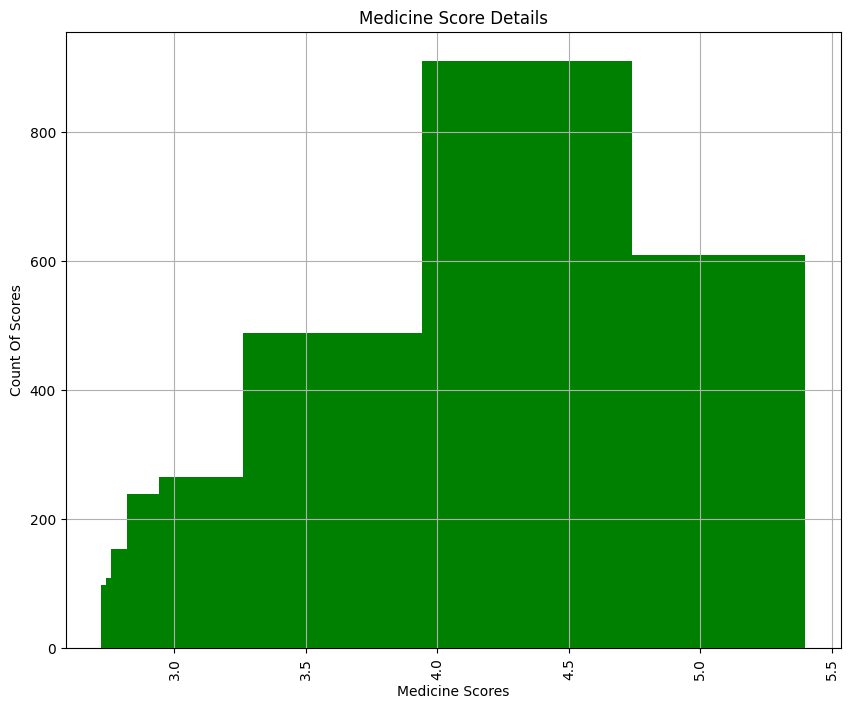

In [27]:
plt.figure(figsize=(10,8))
plt.bar(new_scores, scores_count, color = 'g')
plt.grid(True)
plt.title('Medicine Score Details')
plt.xticks(rotation=90)
plt.xlabel('Medicine Scores')
plt.ylabel('Count Of Scores')
plt.show()

## Creating Tags combining composition and uses

In [28]:
# Creating Tags column for medicines
meds['tags'] = meds['Composition'] + meds['Uses']

In [29]:
meds.head()

,Medicine Name,Composition,Uses,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %,Medicine Score,tags
0,Avastin 400mg Injection,[Bevacizumab(400mg)],"[Cancer, of, colon, and, rectum, Non-small, ce...","https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22,3.00,"[Bevacizumab(400mg), Cancer, of, colon, and, r..."
1,Augmentin 625 Duo Tablet,"[Amoxycillin(500mg), ClavulanicAcid(125mg)]","[Treatment, of, Bacterial, infections]","https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18,3.58,"[Amoxycillin(500mg), ClavulanicAcid(125mg), Tr..."
2,Azithral 500 Tablet,[Azithromycin(500mg)],"[Treatment, of, Bacterial, infections]","https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21,3.36,"[Azithromycin(500mg), Treatment, of, Bacterial..."
3,Ascoril LS Syrup,"[Ambroxol(30mg/5ml), Levosalbutamol(1mg/5ml), ...","[Treatment, of, Cough, with, mucus]","https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35,2.78,"[Ambroxol(30mg/5ml), Levosalbutamol(1mg/5ml), ..."
4,Aciloc 150 Tablet,[Ranitidine(150mg)],"[Treatment, of, Gastroesophageal, reflux, dise...","https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29,3.10,"[Ranitidine(150mg), Treatment, of, Gastroesoph..."


## Creating dataframes with essential columns

In [30]:
new_df = meds[['Medicine Name', 'Uses' ,'Composition', 'tags', 'Manufacturer','Medicine Score', 'Image URL']]

In [31]:
# converting tags column to string form so we can apply stemming
new_df['tags'] = new_df['tags'].apply(lambda x:' '.join(x))

/tmp/ipykernel_20/1840108476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:' '.join(x))


In [32]:
new_df.head()

,Medicine Name,Uses,Composition,tags,Manufacturer,Medicine Score,Image URL
0,Avastin 400mg Injection,"[Cancer, of, colon, and, rectum, Non-small, ce...",[Bevacizumab(400mg)],Bevacizumab(400mg) Cancer of colon and rectum ...,Roche Products India Pvt Ltd,3.00,"https://onemg.gumlet.io/l_watermark_346,w_480,..."
1,Augmentin 625 Duo Tablet,"[Treatment, of, Bacterial, infections]","[Amoxycillin(500mg), ClavulanicAcid(125mg)]",Amoxycillin(500mg) ClavulanicAcid(125mg) Treat...,Glaxo SmithKline Pharmaceuticals Ltd,3.58,"https://onemg.gumlet.io/l_watermark_346,w_480,..."
2,Azithral 500 Tablet,"[Treatment, of, Bacterial, infections]",[Azithromycin(500mg)],Azithromycin(500mg) Treatment of Bacterial inf...,Alembic Pharmaceuticals Ltd,3.36,"https://onemg.gumlet.io/l_watermark_346,w_480,..."
3,Ascoril LS Syrup,"[Treatment, of, Cough, with, mucus]","[Ambroxol(30mg/5ml), Levosalbutamol(1mg/5ml), ...",Ambroxol(30mg/5ml) Levosalbutamol(1mg/5ml) Gua...,Glenmark Pharmaceuticals Ltd,2.78,"https://onemg.gumlet.io/l_watermark_346,w_480,..."
4,Aciloc 150 Tablet,"[Treatment, of, Gastroesophageal, reflux, dise...",[Ranitidine(150mg)],Ranitidine(150mg) Treatment of Gastroesophagea...,Cadila Pharmaceuticals Ltd,3.10,"https://onemg.gumlet.io/l_watermark_346,w_480,..."


In [33]:
new_df['tags'][1]

'Amoxycillin(500mg) ClavulanicAcid(125mg) Treatment of Bacterial infections'

In [34]:
# converting tags column to lowerr case
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

/tmp/ipykernel_20/1802928144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


In [35]:
new_df.head()

,Medicine Name,Uses,Composition,tags,Manufacturer,Medicine Score,Image URL
0,Avastin 400mg Injection,"[Cancer, of, colon, and, rectum, Non-small, ce...",[Bevacizumab(400mg)],bevacizumab(400mg) cancer of colon and rectum ...,Roche Products India Pvt Ltd,3.00,"https://onemg.gumlet.io/l_watermark_346,w_480,..."
1,Augmentin 625 Duo Tablet,"[Treatment, of, Bacterial, infections]","[Amoxycillin(500mg), ClavulanicAcid(125mg)]",amoxycillin(500mg) clavulanicacid(125mg) treat...,Glaxo SmithKline Pharmaceuticals Ltd,3.58,"https://onemg.gumlet.io/l_watermark_346,w_480,..."
2,Azithral 500 Tablet,"[Treatment, of, Bacterial, infections]",[Azithromycin(500mg)],azithromycin(500mg) treatment of bacterial inf...,Alembic Pharmaceuticals Ltd,3.36,"https://onemg.gumlet.io/l_watermark_346,w_480,..."
3,Ascoril LS Syrup,"[Treatment, of, Cough, with, mucus]","[Ambroxol(30mg/5ml), Levosalbutamol(1mg/5ml), ...",ambroxol(30mg/5ml) levosalbutamol(1mg/5ml) gua...,Glenmark Pharmaceuticals Ltd,2.78,"https://onemg.gumlet.io/l_watermark_346,w_480,..."
4,Aciloc 150 Tablet,"[Treatment, of, Gastroesophageal, reflux, dise...",[Ranitidine(150mg)],ranitidine(150mg) treatment of gastroesophagea...,Cadila Pharmaceuticals Ltd,3.10,"https://onemg.gumlet.io/l_watermark_346,w_480,..."


In [36]:
new_df.rename(columns = {'Medicine Name':'Name', }, inplace = True)
new_df.rename(columns = {'Medicine Score':'Score'}, inplace = True)
new_df.rename(columns = {'Image URL':'img_url', }, inplace = True)

/tmp/ipykernel_20/2788549837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns = {'Medicine Name':'Name', }, inplace = True)
/tmp/ipykernel_20/2788549837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns = {'Medicine Score':'Score'}, inplace = True)
/tmp/ipykernel_20/2788549837.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns = {'Image URL':'img_url', }, inplace =

In [37]:
new_df.head()

,Name,Uses,Composition,tags,Manufacturer,Score,img_url
0,Avastin 400mg Injection,"[Cancer, of, colon, and, rectum, Non-small, ce...",[Bevacizumab(400mg)],bevacizumab(400mg) cancer of colon and rectum ...,Roche Products India Pvt Ltd,3.00,"https://onemg.gumlet.io/l_watermark_346,w_480,..."
1,Augmentin 625 Duo Tablet,"[Treatment, of, Bacterial, infections]","[Amoxycillin(500mg), ClavulanicAcid(125mg)]",amoxycillin(500mg) clavulanicacid(125mg) treat...,Glaxo SmithKline Pharmaceuticals Ltd,3.58,"https://onemg.gumlet.io/l_watermark_346,w_480,..."
2,Azithral 500 Tablet,"[Treatment, of, Bacterial, infections]",[Azithromycin(500mg)],azithromycin(500mg) treatment of bacterial inf...,Alembic Pharmaceuticals Ltd,3.36,"https://onemg.gumlet.io/l_watermark_346,w_480,..."
3,Ascoril LS Syrup,"[Treatment, of, Cough, with, mucus]","[Ambroxol(30mg/5ml), Levosalbutamol(1mg/5ml), ...",ambroxol(30mg/5ml) levosalbutamol(1mg/5ml) gua...,Glenmark Pharmaceuticals Ltd,2.78,"https://onemg.gumlet.io/l_watermark_346,w_480,..."
4,Aciloc 150 Tablet,"[Treatment, of, Gastroesophageal, reflux, dise...",[Ranitidine(150mg)],ranitidine(150mg) treatment of gastroesophagea...,Cadila Pharmaceuticals Ltd,3.10,"https://onemg.gumlet.io/l_watermark_346,w_480,..."


## Applying Stemming process

In [38]:
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [39]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
        
    return " ".join(y)

In [40]:
new_df['tags'] = new_df['tags'].apply(stem)

/tmp/ipykernel_20/3213734980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


## Feature Vectorization

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000, stop_words='english')

In [42]:
vector  = cv.fit_transform(new_df['tags']).toarray()

In [43]:
len(vector[0])

2137

In [44]:
len(cv.get_feature_names_out())

2137

In [45]:
from sklearn.metrics.pairwise import cosine_similarity

In [46]:
similarity = cosine_similarity(vector)

In [47]:
similarity.shape

(11825, 11825)

In [48]:
sorted(list(enumerate(similarity[0])), reverse = True, key = lambda x:x[1])[1:6]

[(3289, 0.8111071056538128),
 (6735, 0.6936879756192961),
 (1739, 0.6847623832623259),
 (1740, 0.6847623832623259),
 (11749, 0.6847623832623259)]

In [49]:
# Recommendations based on medicine name
def recommend(medicine):
    recommended_medicine = []
    med_index = new_df[new_df['Name'] == medicine].index[0]
    distances = similarity[med_index]
    med_list = sorted(list(enumerate(distances)), reverse = True, key = lambda x:x[1])[1:51]
    for i in med_list:
        recommended_medicine.append([new_df.iloc[i[0]].Name, new_df.iloc[i[0]].Score])

    recommendations = sorted(recommended_medicine,reverse = True, key = lambda x:x[1])
    seen = set()
    recommended_medicines = [x for x in recommendations if tuple(x) not in seen and not seen.add(tuple(x))]
    
    for i in recommended_medicines:
        print(i)
    

In [50]:
recommend('Azithral 500 Tablet')
# Here output in in the form of medicine name and it's score

['Azithral 500mg Injection', 5.0]
['Azithral Eye Drop', 4.66]
['Azee 1000 Tablet', 4.66]
['Aziquest 500mg Tablet', 4.34]
['Azee 100mg Tablet DT', 4.34]
['Azithral KidTab', 4.34]
['Zatura 500 Tablet', 4.16]
['Azee 250 Tablet', 3.98]
['Aziwok 600 Tablet', 3.88]
['Azimax 250 Tablet', 3.68]
['Azimax 500 Tablet', 3.66]
['Azee 250 Tablet', 3.64]
['Azee 500 Tablet', 3.52]
['Altacef 500 Tablet', 3.4]
['Ibithral 500mg Tablet', 3.38]
['Zithrolect 500 Tablet', 3.34]
['Alevo 500 Tablet', 3.34]
['Hhazi 500 Tablet', 3.32]
['Uthral 500mg Tablet', 3.32]
['ATM 500 Tablet', 3.28]
['Azikem 500mg Tablet', 3.26]
['Azee 500 Tablet', 3.24]
['Trulimax 500mg Tablet', 3.22]
['Zathrin 500 Tablet', 3.22]
['Azax 500 Tablet', 3.16]
['Almox 500 Capsule', 3.12]
['Aziwok 500 Tablet', 3.04]
['Azicip 500 Tablet', 3.02]
['Althrocin 500 Tablet', 3.0]
['Azax 250 Tablet', 3.0]
['Azifast 250 Tablet', 3.0]
['Azifast 500 Tablet', 2.98]
['Azimax 500 Tablet', 2.96]
['Zady 500 Tablet', 2.86]
['Azibact 500 Tablet', 2.84]
['Azithra

In [51]:
# Recommendations based on medicine composition

def recommend_medicine(composition_queries):
    recommendations = []

    # Check for medicines that contain all specified compositions
    for index, row in new_df.iterrows():
        composition = row['Composition']
        if isinstance(composition, list):
            # Check if all composition items are present in the medicine
            if all(query.lower() in ' '.join(composition).lower() for query in composition_queries):
                recommendations.append([row['Name'],  row['Score']])

   

    if recommendations:
        # Remove duplicates and return the recommendations
        medicine_list = sorted(recommendations, reverse = True, key = lambda x:x[1])[:50]
        seen = set()
        recommended_medicines = [x for x in medicine_list if tuple(x) not in seen and not seen.add(tuple(x))]
        return recommended_medicines
    else:
        return "No matching medicines found."

# Example usage:
# recommended_medicines = recommend_medicine(["Amoxycillin(500mg)", "ClavulanicAcid(125mg)"])
# print(recommended_medicines)


In [52]:
recommend_medicine(["Amoxycillin(500mg)", "ClavulanicAcid(125mg)"])

[['Evoxil CV 500mg/125mg Tablet', 5.0],
 ['Lmx Forte 500mg/125mg Tablet', 5.0],
 ['Goldclav 625 Tablet', 4.34],
 ['Lacom-CV 625 Tablet', 4.34],
 ['Oro-CV 625 Tablet', 4.12],
 ['Erox CV 625 Tablet', 4.0],
 ['Tresmox CV 500mg/125mg Tablet', 3.88],
 ['Zovax CV 625 Tablet', 3.66],
 ['Bactoclav 625 Tablet', 3.62],
 ['Novamox CV 625mg Tablet', 3.6],
 ['Xoclave 625 Tablet', 3.6],
 ['Augmentin 625 Duo Tablet', 3.58],
 ['Advent 625 Tablet', 3.56],
 ['Acuclav 625 Tablet', 3.52],
 ['Polyclav 625mg Tablet', 3.52],
 ['Pexoclav 625 Tablet', 3.46],
 ['Rapiclav 625 Tablet', 3.44],
 ['Novaclav 625 Tablet', 3.38],
 ['Moxikind-CV 625 Tablet', 3.34],
 ['Amoxyclav 625 Tablet', 3.3],
 ['Sensiclav 625 Tablet', 3.28],
 ['Augpen 625 BID Tablet', 3.16],
 ['Hhamclav 625 Tablet', 3.16],
 ['Penclav 625 Tablet', 3.14],
 ['Mega-CV 625 Tablet', 3.06],
 ['Mox CV 625 Tablet', 3.06],
 ['Mpx-CV 625 Tablet', 3.0],
 ['Miliclav Tablet', 3.0],
 ['Moxiforce-CV 625 Tablet', 2.92],
 ['Moxclav 625 Tablet', 2.88],
 ['Augpen LB 62

In [53]:
def recommend_medicine1(use_query):
    recommendations = []

    # Check for medicines that contain all specified compositions
    for index, row in new_df.iterrows():
        use = row['Uses']
        if isinstance(use, list):
            # Check if all composition items are present in the medicine
            if all(query.lower() in ' '.join(use).lower() for query in use_query):
                recommendations.append([row['Name'],  row['Score']])

   

    if recommendations:
        # Remove duplicates and return the recommendations
        medicine_list = sorted(recommendations, reverse = True, key = lambda x:x[1])[:50]
        seen = set()
        recommended_medicines = [x for x in medicine_list if tuple(x) not in seen and not seen.add(tuple(x))]
        return recommended_medicines
    else:
        return "No medicines found for this disease."

In [54]:
recommend_medicine1(['Sneezing'])

[['Azep Nasal Spray', 5.0],
 ['Alz Plus  Tablet', 5.0],
 ['Exocast Tablet', 5.0],
 ['Emimont 5mg/10mg Tablet', 5.0],
 ['Fexolife M 10 mg/120 mg Tablet', 5.0],
 ['Levocet M Syrup', 5.0],
 ['Montas-L', 5.0],
 ['Momefit Nasal Spray', 5.0],
 ['Momenta 50mcg Nasal Spray', 5.0],
 ['Montark-L Tablet', 5.0],
 ['Orpa Nasal Spray', 5.0],
 ['Romilast L 5 Tablet', 5.0],
 ['Romilast L Syrup', 5.0],
 ['Recofast LM Tablet', 5.0],
 ['Zeemont 5mg/10mg Tablet', 5.0],
 ['Ancer LM Syrup', 4.66],
 ['Ebmont FX 10mg/120mg Tablet', 4.66],
 ['Romilast 5mg Tablet MD', 4.66],
 ['Alday Duo 5mg/10mg Tablet', 4.56],
 ['Pilot M 10mg/120mg Tablet', 4.56],
 ['Respizen Nasal Spray', 4.56],
 ['Levocet M Kid Tablet MD', 4.5],
 ['Lekast Tablet', 4.5],
 ['Alorti-M Tablet', 4.34],
 ['Afineday Tablet', 4.34],
 ['Admont-LC Tablet', 4.34],
 ['Airkast-FX Tablet', 4.34],
 ['Ebonte-M Tablet', 4.34],
 ['L-Hist Mont Syrup', 4.34],
 ['Lit M Tablet', 4.34],
 ['Levokon-M Tablet', 4.34],
 ['Levotiz-M Tablet', 4.34],
 ['LCZ-Mont Suspens

In [55]:
# In this project we recommend medicines in three ways
# - Based on Medicine Name
# - Based on Medicine Composition
# - Based on Disease